## Prediction of Corona Cases in India

#### Dataset link: https://api.covid19india.org/documentation/csv/ - July to August

In [1]:
#Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load the data
data=pd.read_csv('covid_jul_data.csv')
data

,Entry_ID,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Num Cases,Current Status,Contracted from which Patient (Suspected),Notes,Source_1,Source_2,Source_3,Nationality,Type of transmission,Status Change Date,Patient Number
0,196658,NaN,23/07/2020,NaN,NaN,NaN,Aizawl,Mizoram,MZ,7,Hospitalized,NaN,NaN,https://twitter.com/dipr_mizoram/status/128611...,https://twitter.com/dipr_mizoram/status/128611...,NaN,NaN,NaN,NaN,NaN
1,196659,NaN,23/07/2020,NaN,NaN,NaN,Champhai,Mizoram,MZ,1,Hospitalized,NaN,NaN,https://twitter.com/dipr_mizoram/status/128611...,https://twitter.com/dipr_mizoram/status/128611...,NaN,NaN,NaN,NaN,NaN
2,196660,NaN,23/07/2020,NaN,NaN,NaN,Kolasib,Mizoram,MZ,1,Hospitalized,NaN,NaN,https://twitter.com/dipr_mizoram/status/128611...,https://twitter.com/dipr_mizoram/status/128611...,NaN,NaN,NaN,NaN,NaN
3,196661,NaN,23/07/2020,NaN,NaN,NaN,Angul,Odisha,OR,7,Hospitalized,NaN,NaN,https://twitter.com/IPR_Odisha/status/12861754...,NaN,NaN,NaN,NaN,NaN,NaN
4,196662,NaN,23/07/2020,NaN,NaN,NaN,Balasore,Odisha,OR,9,Hospitalized,NaN,NaN,https://twitter.com/IPR_Odisha/status/12861754...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22329,219096,NaN,04/08/2020,NaN,NaN,NaN,Nagaon,Assam,AS,151,Hospitalized,NaN,Recon as per Dashboard,https://covid19.assam.gov.in/all-districts/,NaN,NaN,NaN,NaN,NaN,NaN
22330,219097,NaN,04/08/2020,NaN,NaN,NaN,Dibrugarh,Assam,AS,114,Hospitalized,NaN,Recon as per Dashboard,https://covid19.assam.gov.in/all-districts/,NaN,NaN,NaN,NaN,NaN,NaN
22331,219098,NaN,04/08/2020,NaN,NaN,NaN,Tinsukia,Assam,AS,122,Hospitalized,NaN,Recon as per Dashboard,https://covid19.assam.gov.in/all-districts/,NaN,NaN,NaN,NaN,NaN,NaN
22332,219099,NaN,04/08/2020,NaN,NaN,NaN,Cachar,Assam,AS,163,Hospitalized,NaN,Recon as per Dashboard,https://covid19.assam.gov.in/all-districts/,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22334 entries, 0 to 22333
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Entry_ID                                   22334 non-null  int64  
 1   State Patient Number                       1288 non-null   object 
 2   Date Announced                             22334 non-null  object 
 3   Age Bracket                                2060 non-null   object 
 4   Gender                                     2036 non-null   object 
 5   Detected City                              637 non-null    object 
 6   Detected District                          21981 non-null  object 
 7   Detected State                             22334 non-null  object 
 8   State code                                 22334 non-null  object 
 9   Num Cases                                  22334 non-null  int64  
 10  Current Status        

In [3]:
data.columns

Index(['Entry_ID', 'State Patient Number', 'Date Announced', 'Age Bracket',
       'Gender', 'Detected City', 'Detected District', 'Detected State',
       'State code', 'Num Cases', 'Current Status',
       'Contracted from which Patient (Suspected)', 'Notes', 'Source_1',
       'Source_2', 'Source_3', 'Nationality', 'Type of transmission',
       'Status Change Date', 'Patient Number'],
      dtype='object')

In [4]:
#Selecting required columns
data=data.loc[:,['Num Cases','Date Announced','Age Bracket','Gender', 'Detected City', 'Detected District', 'Detected State','Current Status',]]
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status
0,7,23/07/2020,NaN,NaN,NaN,Aizawl,Mizoram,Hospitalized
1,1,23/07/2020,NaN,NaN,NaN,Champhai,Mizoram,Hospitalized
2,1,23/07/2020,NaN,NaN,NaN,Kolasib,Mizoram,Hospitalized
3,7,23/07/2020,NaN,NaN,NaN,Angul,Odisha,Hospitalized
4,9,23/07/2020,NaN,NaN,NaN,Balasore,Odisha,Hospitalized
...,...,...,...,...,...,...,...,...
22329,151,04/08/2020,NaN,NaN,NaN,Nagaon,Assam,Hospitalized
22330,114,04/08/2020,NaN,NaN,NaN,Dibrugarh,Assam,Hospitalized
22331,122,04/08/2020,NaN,NaN,NaN,Tinsukia,Assam,Hospitalized
22332,163,04/08/2020,NaN,NaN,NaN,Cachar,Assam,Hospitalized


In [5]:
#Splitting Date Column
date=data['Date Announced'].str.split('/',expand=True)
date.columns=['Date','Month','Year']
date

,Date,Month,Year
0,23,07,2020
1,23,07,2020
2,23,07,2020
3,23,07,2020
4,23,07,2020
...,...,...,...
22329,04,08,2020
22330,04,08,2020
22331,04,08,2020
22332,04,08,2020


In [6]:
data=pd.concat([data,date],axis=1)
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Date,Month,Year
0,7,23/07/2020,NaN,NaN,NaN,Aizawl,Mizoram,Hospitalized,23,07,2020
1,1,23/07/2020,NaN,NaN,NaN,Champhai,Mizoram,Hospitalized,23,07,2020
2,1,23/07/2020,NaN,NaN,NaN,Kolasib,Mizoram,Hospitalized,23,07,2020
3,7,23/07/2020,NaN,NaN,NaN,Angul,Odisha,Hospitalized,23,07,2020
4,9,23/07/2020,NaN,NaN,NaN,Balasore,Odisha,Hospitalized,23,07,2020
...,...,...,...,...,...,...,...,...,...,...,...
22329,151,04/08/2020,NaN,NaN,NaN,Nagaon,Assam,Hospitalized,04,08,2020
22330,114,04/08/2020,NaN,NaN,NaN,Dibrugarh,Assam,Hospitalized,04,08,2020
22331,122,04/08/2020,NaN,NaN,NaN,Tinsukia,Assam,Hospitalized,04,08,2020
22332,163,04/08/2020,NaN,NaN,NaN,Cachar,Assam,Hospitalized,04,08,2020


In [7]:
#Finding Null values
data.isnull().sum()

Num Cases                0
Date Announced           0
Age Bracket          20274
Gender               20298
Detected City        21697
Detected District      353
Detected State           0
Current Status           0
Date                     0
Month                    0
Year                     0
dtype: int64

In [8]:
#Group by Month
data.groupby('Month')['Num Cases'].sum()

Month
03         0
05         0
06         0
07    775424
08    615207
Name: Num Cases, dtype: int64

In [9]:
mon_data=data[data['Current Status']=='Hospitalized'].groupby('Month')['Num Cases'].sum()

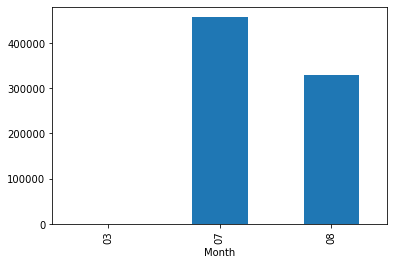

In [10]:
mon_data.plot.bar()

In [11]:
data.groupby('Gender')['Num Cases'].sum()

Gender
F              697
Femal e          1
M             1337
Non-Binary       1
Name: Num Cases, dtype: int64

In [12]:
#Group by State
state=data[data['Current Status']=='Hospitalized'].groupby('Detected State')['Num Cases'].sum()

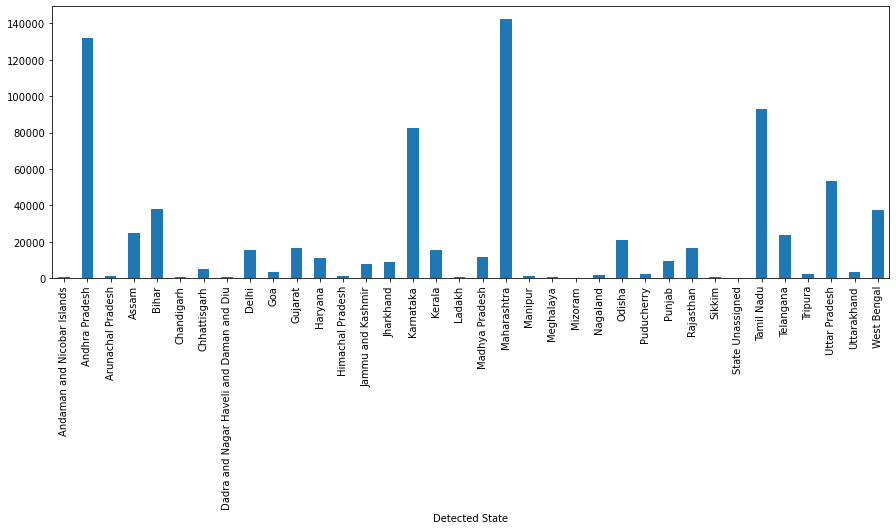

In [13]:
state.plot.bar(figsize=(15,5))

In [14]:
data

,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Date,Month,Year
0,7,23/07/2020,NaN,NaN,NaN,Aizawl,Mizoram,Hospitalized,23,07,2020
1,1,23/07/2020,NaN,NaN,NaN,Champhai,Mizoram,Hospitalized,23,07,2020
2,1,23/07/2020,NaN,NaN,NaN,Kolasib,Mizoram,Hospitalized,23,07,2020
3,7,23/07/2020,NaN,NaN,NaN,Angul,Odisha,Hospitalized,23,07,2020
4,9,23/07/2020,NaN,NaN,NaN,Balasore,Odisha,Hospitalized,23,07,2020
...,...,...,...,...,...,...,...,...,...,...,...
22329,151,04/08/2020,NaN,NaN,NaN,Nagaon,Assam,Hospitalized,04,08,2020
22330,114,04/08/2020,NaN,NaN,NaN,Dibrugarh,Assam,Hospitalized,04,08,2020
22331,122,04/08/2020,NaN,NaN,NaN,Tinsukia,Assam,Hospitalized,04,08,2020
22332,163,04/08/2020,NaN,NaN,NaN,Cachar,Assam,Hospitalized,04,08,2020


In [15]:
day=data[data['Current Status']=='Hospitalized'].groupby(['Month','Date'])['Num Cases'].sum()
day

Month  Date
03     10          0
07     10        -13
       19          0
       23      48443
       24      48888
       25      50072
       26      48932
       27      46484
       28      49631
       29      52479
       30      54968
       31      57486
08     01      55117
       02      52672
       03      50488
       04      51282
       05      56626
       06      62170
Name: Num Cases, dtype: int64

In [16]:
len(day)

18

In [17]:
# No of days
X=np.arange(len(day))
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [18]:
# No of cases
y=day.values
y

array([    0,   -13,     0, 48443, 48888, 50072, 48932, 46484, 49631,
       52479, 54968, 57486, 55117, 52672, 50488, 51282, 56626, 62170],
      dtype=int64)

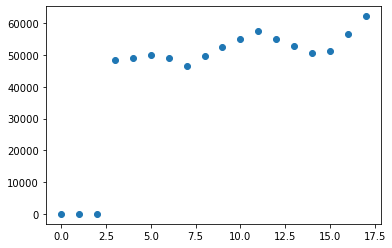

In [19]:
plt.scatter(X,y)

In [20]:
X=X.reshape(-1,1)
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17]])

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [22]:
#Predicting 18th day
model.predict([[18]])

array([70475.67320261])

In [23]:
#y predictions through model
Yp=model.predict(X)
Yp

array([19650.71345029, 22474.32232542, 25297.93120055, 28121.54007568,
       30945.14895081, 33768.75782594, 36592.36670107, 39415.9755762 ,
       42239.58445132, 45063.19332645, 47886.80220158, 50710.41107671,
       53534.01995184, 56357.62882697, 59181.2377021 , 62004.84657723,
       64828.45545236, 67652.06432749])

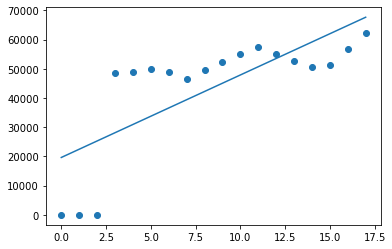

In [24]:
# Plotting X,Y 
plt.scatter(X,y)
plt.plot(X,Yp)
plt.show()

In [25]:
# Accuracy of regression model
model.score(X,y)*100

54.350581757237435

## Polynomial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2)
x=poly.fit_transform(X)
x

array([[  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  17., 289.]])

In [27]:
poly_x=pd.DataFrame(x)
poly_x

,0,1,2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0
5,1.0,5.0,25.0
6,1.0,6.0,36.0
7,1.0,7.0,49.0
8,1.0,8.0,64.0
9,1.0,9.0,81.0


In [28]:
from sklearn.linear_model import LinearRegression
poly_model=LinearRegression()
poly_model.fit(x,y)

LinearRegression()

In [29]:
poly_model.coef_

array([   0.        , 9483.87970846, -391.78063725])

In [30]:
poly_model.intercept_

1889.9912280702702

In [31]:
#predictions of y through model
Yp=poly_model.predict(x)
Yp

array([ 1889.99122807, 10982.09029928, 19290.62809598, 26815.60461816,
       33557.01986584, 39514.87383901, 44689.16653767, 49079.89796182,
       52687.06811146, 55510.67698658, 57550.7245872 , 58807.21091331,
       59280.13596491, 58969.499742  , 57875.30224458, 55997.54347265,
       53336.22342621, 49891.34210526])

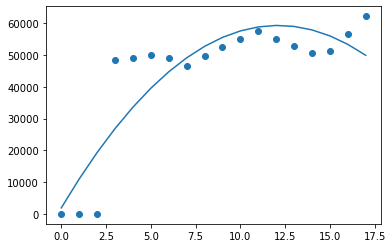

In [32]:
plt.scatter(X,y)
plt.plot(X,Yp)
plt.show()

In [33]:
#Accuracy of polynomial regression
poly_model.score(x,y)*100

76.67292471690598

## Support Vector Regression

In [34]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [35]:
from sklearn.preprocessing import StandardScaler
s_x=StandardScaler()
s_y=StandardScaler()
sx=s_x.fit_transform(X)
sy=s_y.fit_transform(y)

In [36]:
from sklearn.svm import SVR
reg_model=SVR(kernel='rbf')
reg_model.fit(sx,sy)

C:\Users\sreer\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [37]:
#Accuracy of SVR
reg_model.score(sx,sy)*100

76.72079562111675

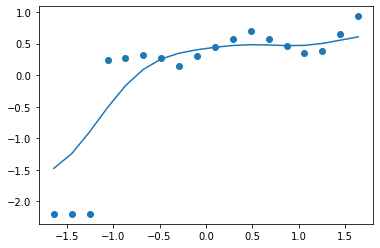

In [38]:
plt.scatter(sx,sy)
plt.plot(sx,reg_model.predict(sx))